# Plotting points on a Map with WCSAxes

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/wcsaxes_plotting_example.html

This example demonstrates the plotting of a point, a line and an arch in pixel coordinates,
world coordinates, and SkyCoords respectively when plotting a map with WCSAxes.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.data.sample
import sunpy.map
from sunpy.coordinates.utils import GreatArc

We will start by creating a map using an AIA 171 image.
Then we shall create a standard plot of this map.

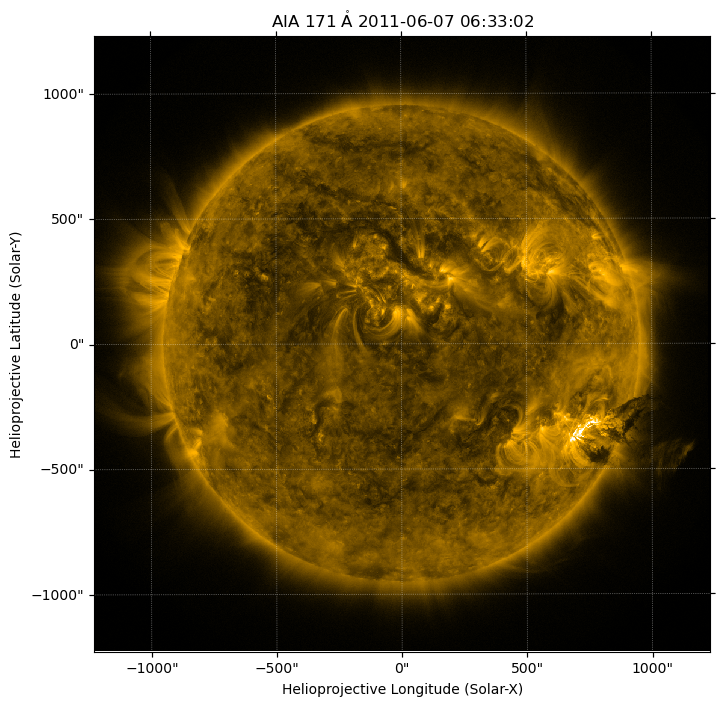

In [ ]:
my_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection=my_map)
my_map.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)
plt.show()

Now we will plot a line on the map by using coordinates in arcseconds.
The array below ``xx`` and ``yy`` are the x and y coordinates that define a
line from the Sun center (at 0, 0) to the point (500, 500) in arcsecs.
When plotting a map a WCSAxes is created.
For plotting with WCSAxes, pixel coordinates are expected as a default, however,
we can plot world coordinates (i.e. arcsec) by using the ``transform`` keyword.
Its important to note that when transforming between world and pixel coordinates
the world coordinates need to be in degrees rather than arcsecs.

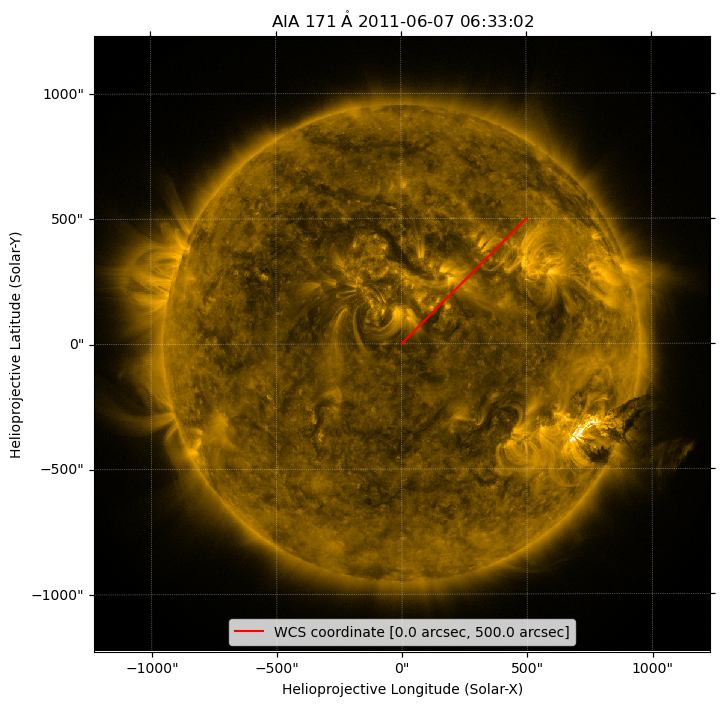

In [ ]:
my_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection=my_map)
my_map.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)

xx = np.arange(0, 500) * u.arcsec
yy = xx

# Note that the coordinates need to be in degrees rather than arcseconds.
ax.plot(xx.to(u.deg), yy.to(u.deg),
        color='r',
        transform=ax.get_transform("world"),
        label=f'WCS coordinate [{0*u.arcsec}, {500*u.arcsec}]')

ax.legend(loc="lower center")
plt.show()

Here we will plot a point in pixel coordinates (i.e. array index).
Let's define a pixel coordinate in the middle of the image, ``pixel_coord``.
As this coordinate is in pixel space (rather than a world coordinates like arcsec)
we do not need to use the ``transform`` keyword.

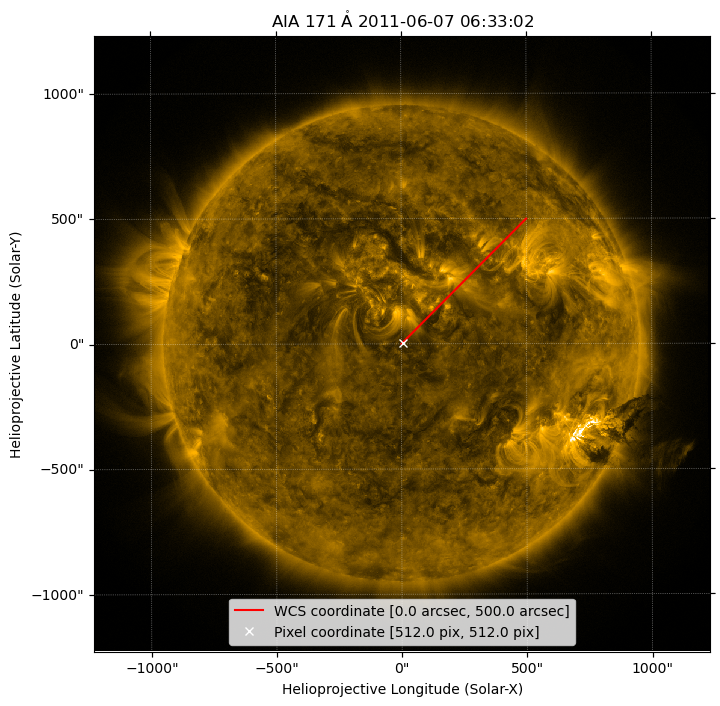

In [ ]:
my_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection=my_map)
my_map.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)

xx = np.arange(0, 500) * u.arcsec
yy = xx

# Note that the coordinates need to be in degrees rather than arcseconds.
ax.plot(xx.to(u.deg), yy.to(u.deg),
        color='r',
        transform=ax.get_transform("world"),
        label=f'WCS coordinate [{0*u.arcsec}, {500*u.arcsec}]')

pixel_coord = [my_map.data.shape[0]/2., my_map.data.shape[1]/2.] * u.pix
ax.plot(pixel_coord[0], pixel_coord[1], 'x', color='w',
        label=f'Pixel coordinate [{pixel_coord[0]}, {pixel_coord[1]}]')

ax.legend(loc="lower center")
plt.show()

As well as defining a point and using `GenericMap.plot()`, you can also plot
a point with WCSAxes using the `astropy.visualization.wcsaxes.WCSAxes.plot_coord`
functionality using a coordinate as a SkyCoord.
We can demonstrate this by plotting a point and an arc on a map using two separate SkyCoords.
Here we will plot a point (at -250,-250) on the map using a SkyCoord.

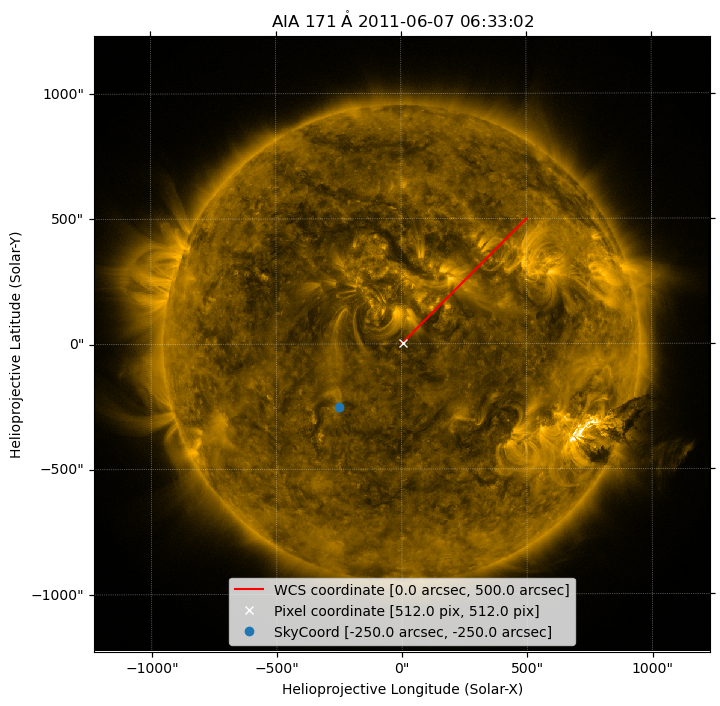

In [ ]:
my_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection=my_map)
my_map.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)

xx = np.arange(0, 500) * u.arcsec
yy = xx

# Note that the coordinates need to be in degrees rather than arcseconds.
ax.plot(xx.to(u.deg), yy.to(u.deg),
        color='r',
        transform=ax.get_transform("world"),
        label=f'WCS coordinate [{0*u.arcsec}, {500*u.arcsec}]')

pixel_coord = [my_map.data.shape[0]/2., my_map.data.shape[1]/2.] * u.pix
ax.plot(pixel_coord[0], pixel_coord[1], 'x', color='w',
        label=f'Pixel coordinate [{pixel_coord[0]}, {pixel_coord[1]}]')

ax.plot_coord(SkyCoord(-250*u.arcsec, -250*u.arcsec, frame=my_map.coordinate_frame), "o",
              label=f'SkyCoord [{-250*u.arcsec}, {-250*u.arcsec}]')

ax.legend(loc="lower center")
plt.show()

Finally, let's create a great arc between a start and end point defined as SkyCoords.

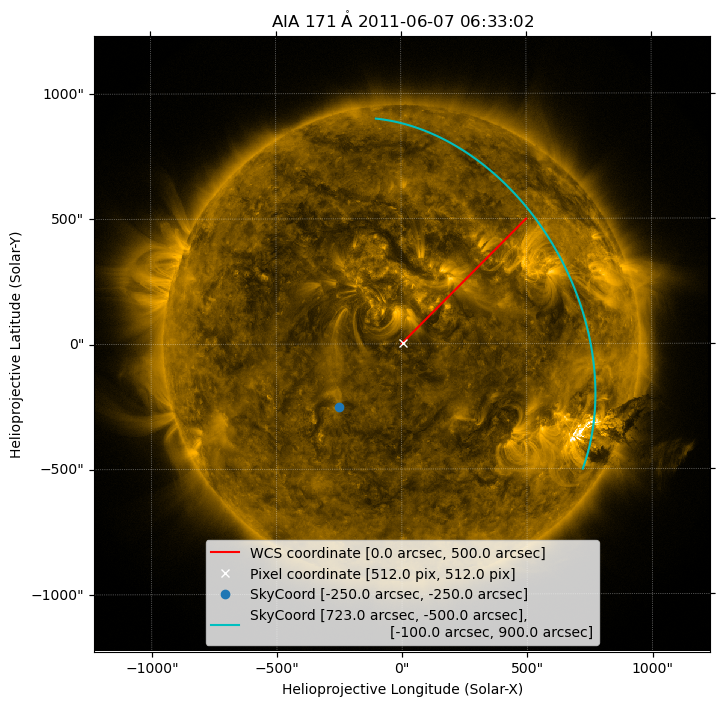

In [ ]:
my_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection=my_map)
my_map.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)

xx = np.arange(0, 500) * u.arcsec
yy = xx

# Note that the coordinates need to be in degrees rather than arcseconds.
ax.plot(xx.to(u.deg), yy.to(u.deg),
        color='r',
        transform=ax.get_transform("world"),
        label=f'WCS coordinate [{0*u.arcsec}, {500*u.arcsec}]')

pixel_coord = [my_map.data.shape[0]/2., my_map.data.shape[1]/2.] * u.pix
ax.plot(pixel_coord[0], pixel_coord[1], 'x', color='w',
        label=f'Pixel coordinate [{pixel_coord[0]}, {pixel_coord[1]}]')

ax.plot_coord(SkyCoord(-250*u.arcsec, -250*u.arcsec, frame=my_map.coordinate_frame), "o",
              label=f'SkyCoord [{-250*u.arcsec}, {-250*u.arcsec}]')

start = SkyCoord(723 * u.arcsec, -500 * u.arcsec, frame=my_map.coordinate_frame)
end = SkyCoord(-100 * u.arcsec, 900 * u.arcsec, frame=my_map.coordinate_frame)

great_arc = GreatArc(start, end)

ax.plot_coord(great_arc.coordinates(), color='c',
              label=f'SkyCoord [{723*u.arcsec}, {-500*u.arcsec}],\n \
                               [{-100*u.arcsec}, {900*u.arcsec}]')

ax.legend(loc="lower center")
plt.show()